# Análisis y Diseño de Circuitos Transitorios
**Métodos Numéricos en Ingeniería Eléctrica**

## 1. Introducción y Objetivos de Aprendizaje Avanzados

Al finalizar esta clase avanzada, los estudiantes serán capaces de:
1. Analizar en profundidad el comportamiento transitorio de circuitos RLC.
2. Aplicar y comparar diferentes métodos numéricos para resolver ecuaciones trascendentes en el diseño de circuitos.
3. Utilizar herramientas de simulación para validar resultados numéricos.
4. Evaluar el impacto de la selección de componentes en el rendimiento del circuito.
5. Relacionar el análisis de circuitos transitorios con aplicaciones de ingeniería eléctrica avanzadas.

## 2. Teoría Avanzada de Circuitos Eléctricos Transitorios

### 2.1 Análisis Detallado de Componentes
- Resistor (R): $V_R = iR$ (Ley de Ohm)
- Inductor (L): $V_L = L\frac{di}{dt}$ (Ley de Faraday)
- Capacitor (C): $V_C = \frac{1}{C}\int i dt$ (Relación carga-voltaje)

### 2.2 Ecuación Diferencial del Circuito RLC
Derivación paso a paso de la ecuación diferencial:

$$L\frac{d^2q}{dt^2} + R\frac{dq}{dt} + \frac{1}{C}q = 0$$

### 2.3 Análisis de la Solución
Explicación detallada de la solución:

$$q(t) = q_0e^{-\alpha t}\cos(\omega_d t)$$

Donde:
- $\alpha = \frac{R}{2L}$ (factor de amortiguamiento)
- $\omega_d = \sqrt{\frac{1}{LC} - \alpha^2}$ (frecuencia angular amortiguada)

## 3. Métodos Numéricos Avanzados

### 3.1 Método de Bisección Mejorado
Implementación en Python con análisis de convergencia:


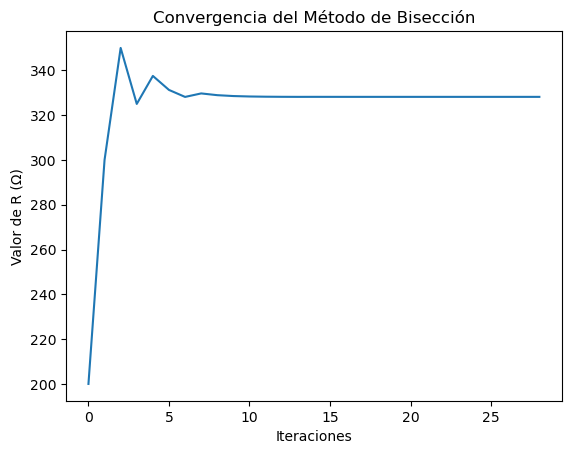

El valor de R es: 328.1514 Ω


In [1]:
import math
import matplotlib.pyplot as plt

def f(R, L, C, t, q_ratio):
    return math.exp(-R*t/(2*L)) * math.cos(math.sqrt(1/(L*C) - (R/(2*L))**2) * t) - q_ratio

def bisection(f, a, b, tol=1e-6, max_iter=100, **kwargs):
    iterations = []
    for i in range(max_iter):
        c = (a + b) / 2
        iterations.append(c)
        if f(c, **kwargs) == 0 or (b - a) / 2 < tol:
            return c, iterations
        if f(c, **kwargs) * f(a, **kwargs) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2, iterations

# Parámetros del problema
L, C, t, q_ratio = 5, 1e-4, 0.05, 0.01

# Aplicar bisección
R, iterations = bisection(f, 0, 400, L=L, C=C, t=t, q_ratio=q_ratio)

# Graficar convergencia
plt.plot(range(len(iterations)), iterations)
plt.title('Convergencia del Método de Bisección')
plt.xlabel('Iteraciones')
plt.ylabel('Valor de R (Ω)')
plt.show()

print(f"El valor de R es: {R:.4f} Ω")

### 3.2 Comparación con Otros Métodos
Implementación y comparación del método de Newton-Raphson y el método de la secante.

## 4. Simulación Avanzada de Circuitos

### 4.1 Simulación con Python
Uso de la biblioteca SciPy para simular el comportamiento del circuito:

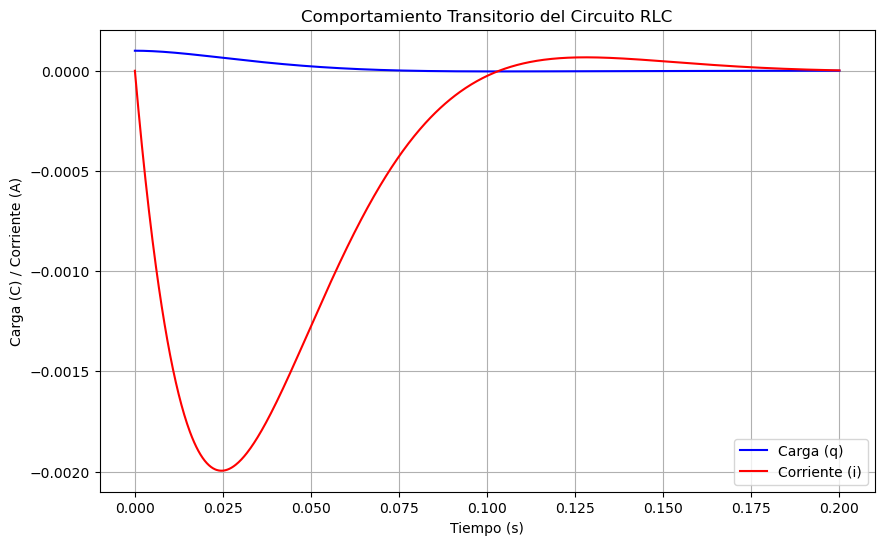

In [2]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def circuit_ode(y, t, L, R, C):
    q, i = y
    dydt = [i, -R/L*i - 1/(L*C)*q]
    return dydt

# Parámetros
L, C = 5, 1e-4
R = 328.1515  # Valor obtenido del método de bisección
q0, i0 = 1e-4, 0  # Condiciones iniciales

# Tiempo de simulación
t = np.linspace(0, 0.2, 1000)

# Resolver ODE
sol = odeint(circuit_ode, [q0, i0], t, args=(L, R, C))

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(t, sol[:, 0], 'b', label='Carga (q)')
plt.plot(t, sol[:, 1], 'r', label='Corriente (i)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Carga (C) / Corriente (A)')
plt.title('Comportamiento Transitorio del Circuito RLC')
plt.legend()
plt.grid(True)
plt.show()

### 4.2 Análisis de Sensibilidad
Estudio del impacto de variaciones en R, L y C en el comportamiento del circuito.

## 5. Aplicaciones Avanzadas en Ingeniería Eléctrica

### 5.1 Filtros Activos
Discusión sobre cómo el análisis transitorio se aplica en el diseño de filtros activos.

### 5.2 Sistemas de Potencia
Relevancia del comportamiento transitorio en la estabilidad de sistemas de potencia.

### 5.3 Circuitos de Conmutación Rápida
Importancia en el diseño de fuentes de alimentación conmutadas y circuitos digitales de alta velocidad.

## 6. Tecnologías Emergentes y Futuras Direcciones

### 6.1 Circuitos Cuánticos
Breve introducción a cómo los principios de circuitos transitorios se extienden a la computación cuántica.

### 6.2 Sistemas de Energía Renovable
Aplicación en el diseño de inversores y sistemas de almacenamiento de energía.

## 7. Ejercicios Avanzados

1. Desarrollar un programa que encuentre automáticamente los valores de R, L y C para lograr un tiempo de establecimiento específico con un sobrepaso máximo dado.

2. Implementar un método numérico adaptativo que combine bisección y Newton-Raphson para optimizar la velocidad y robustez de la solución.

3. Diseñar un circuito RLC que funcione como un filtro paso banda, utilizando métodos numéricos para optimizar su respuesta en frecuencia.

4. Investigar y modelar el comportamiento de un circuito RLC no lineal, donde R varía con la corriente. Comparar los resultados con el caso lineal.

## 8. Proyecto Final

Diseñar un sistema de control para un convertidor DC-DC utilizando análisis transitorio y métodos numéricos. El proyecto debe incluir:
- Modelado matemático del sistema
- Simulación del comportamiento transitorio
- Optimización de parámetros usando métodos numéricos
- Análisis de estabilidad y rendimiento
- Presentación de resultados y recomendaciones de diseño

## 9. Conclusión y Perspectivas Futuras

- Recapitulación de la importancia de los métodos numéricos en el análisis y diseño de circuitos eléctricos avanzados.
- Discusión sobre las tendencias futuras en la integración de métodos numéricos con inteligencia artificial para el diseño de circuitos.

## 10. Referencias Avanzadas y Recursos Adicionales

1. Kundur, P. (1994). Power System Stability and Control. McGraw-Hill.
2. Rashid, M. H. (2017). Power Electronics: Devices, Circuits, and Applications. Pearson.
3. Oppenheim, A. V., & Schafer, R. W. (2014). Discrete-Time Signal Processing. Pearson.
4. IEEE Xplore Digital Library: [https://ieeexplore.ieee.org/](https://ieeexplore.ieee.org/)
5. MathWorks MATLAB & Simulink: [https://www.mathworks.com/products/matlab.html](https://www.mathworks.com/products/matlab.html)

